In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("./diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
689,1,144,82,46,180,46.1,0.335,46,1
735,4,95,60,32,0,35.4,0.284,28,0
66,0,109,88,30,0,32.5,0.855,38,1
702,1,168,88,29,0,35.0,0.905,52,1
191,9,123,70,44,94,33.1,0.374,40,0
56,7,187,68,39,304,37.7,0.254,41,1
766,1,126,60,0,0,30.1,0.349,47,1
141,5,106,82,30,0,39.5,0.286,38,0
196,1,105,58,0,0,24.3,0.187,21,0
561,0,198,66,32,274,41.3,0.502,28,1


In [6]:
df.shape

(768, 9)

In [7]:
df.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id='boxplots'></a>

### Boxplots

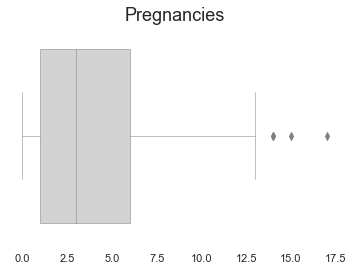

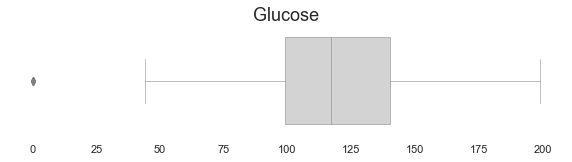

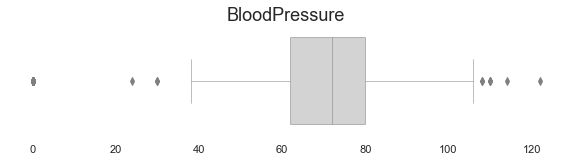

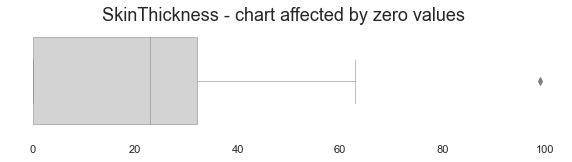

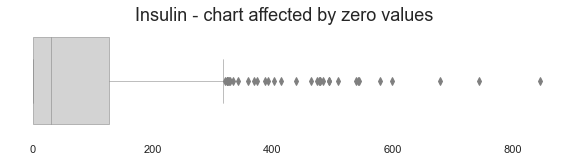

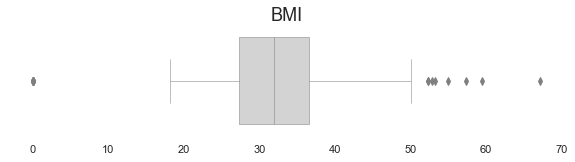

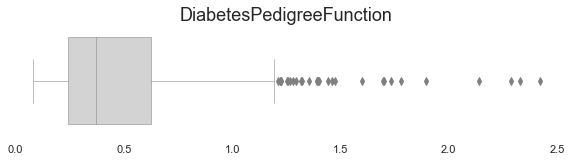

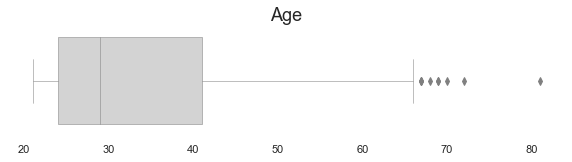

In [9]:
for col in df.iloc[:, 0:-1].columns:
    plt.figure()
    sns.set(rc={"figure.figsize":(10, 2)})
    sns.boxplot(data=df[col], orient='h', color = "lightgrey", linewidth = 0.5).set_facecolor('none')
    affected_boxplots = ["SkinThickness", "Insulin"]
    plt.title(fontsize = 18, label = col if not col in affected_boxplots else col + " - chart affected by zero values ")
    plt.yticks([])
    plt.grid(False)

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# counting zero values on columns that value should be different than zero
mask = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].eq(0)
counts = mask.sum()
print(counts)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [12]:
round(counts / df.shape[0] * 100, 1)
# some of the data is lacking, even though there is no null values is dataset
# specially insulin and skin thickness measurements are not complete

Glucose                      0.7
BloodPressure                4.6
SkinThickness               29.6
Insulin                     48.7
BMI                          1.4
DiabetesPedigreeFunction     0.0
Age                          0.0
dtype: float64

In [13]:
# number of duplicated rows
len(df)-len(df.drop_duplicates())

0

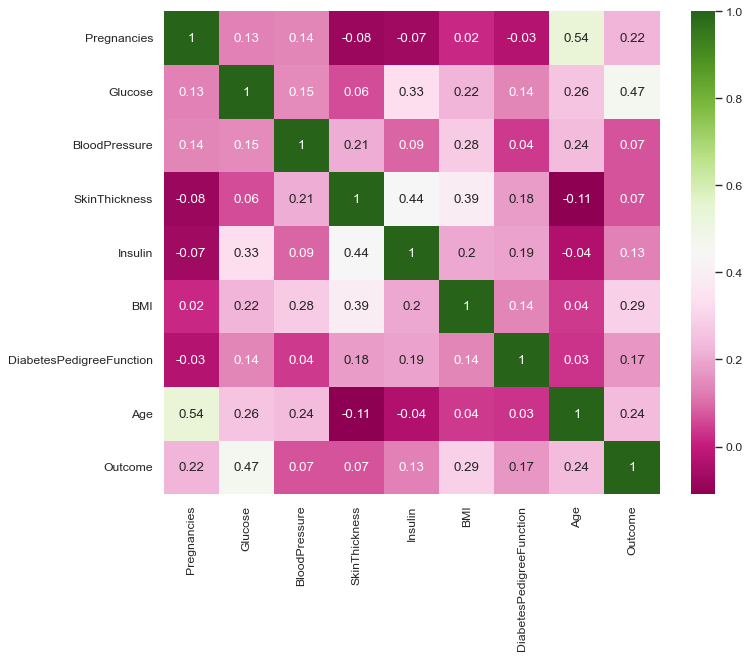

In [14]:
# correlation heat map
figure = plt.figure(figsize = (10, 8), dpi=80)
sns.heatmap(df.corr().round(2), annot=True, cmap="PiYG")
plt.show()

In [ ]:
# check DataFrame before before changing zero to null values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# check averages before changing zero to null values
df.groupby("Outcome")[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].agg(["mean"]).round(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,mean,mean,mean,mean,mean,mean,mean
Outcome,,,,,,,
0,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,141.26,70.82,22.16,100.34,35.14,0.55,37.07


In [16]:
# replacing <=0 values by NaN
# for each Column in DataFrame iterate through each Element in the Column
df.loc[:, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]] = \
df.loc[:, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].apply(lambda col:\
                                                                                                                        col.apply(lambda element: np.nan if element <= 0 else element))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
# check null values after replacement
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
# adding age_group column to fill N/A fields with avergaes based on age group
def age_grouped(age:int) -> int:
    if age <= 30:
        return 1
    if age <= 40:
        return 2
    if age <= 50:
        return 3
    else:
        return 4
    
df["age_group"] = df["Age"].apply(age_grouped)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,3
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,2
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,4
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,3


In [19]:
# averages that are not affected by zero values
df.groupby("age_group")[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].agg(["mean"])

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
,mean,mean,mean,mean,mean,mean,mean
age_group,,,,,,,
1,115.002415,68.962025,27.795107,140.624000,32.012990,0.446827,24.599520
2,126.987179,74.046980,31.310680,162.743243,32.886624,0.536994,35.146497
3,126.000000,77.532110,31.300000,162.166667,34.501770,0.452593,44.327434
4,139.679012,79.362500,30.902439,259.857143,30.975949,0.501519,58.567901


In [20]:
# store means in a dictionary
age_group_1, age_group_2, age_group_3, age_group_4 = 1, 2, 3, 4
means = {}

for age_group in [age_group_1, age_group_2, age_group_3, age_group_4 ]:
    means[age_group] = df[df["age_group"] == age_group].mean()

means

{1: Pregnancies                   2.007194
 Glucose                     115.002415
 BloodPressure                68.962025
 SkinThickness                27.795107
 Insulin                     140.624000
 BMI                          32.012990
 DiabetesPedigreeFunction      0.446827
 Age                          24.599520
 Outcome                       0.215827
 age_group                     1.000000
 dtype: float64,
 2: Pregnancies                   5.273885
 Glucose                     126.987179
 BloodPressure                74.046980
 SkinThickness                31.310680
 Insulin                     162.743243
 BMI                          32.886624
 DiabetesPedigreeFunction      0.536994
 Age                          35.146497
 Outcome                       0.484076
 age_group                     2.000000
 dtype: float64,
 3: Pregnancies                   7.123894
 Glucose                     126.000000
 BloodPressure                77.532110
 SkinThickness                31.3000

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,3
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,2
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,4
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,3


In [22]:
# fill N/A with means for each age group
for col in df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]:
    df[col].fillna(df.apply(lambda x: means[x['age_group']][col], axis=1), inplace=True) 
    
    # means[x['age_group']] return age group for particular row which corensponds with dictionary key
    # [col] in lambda function return column name which coresponds with dictionary value
    # whole expresion means[x['age_group']][col] return value for particular age group and column name

In [23]:
# column age_group is no longer needed
df.drop(columns=["age_group"])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,162.166667,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,162.743243,26.6,0.351,31,0
2,8,183.0,64.0,31.31068,162.743243,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,140.624000,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,31.30000,162.166667,30.1,0.349,47,1


In [24]:
# check if there is no null values after the replacement
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
age_group                   0
dtype: int64

In [25]:
# counting zero values on columns that value should be different than zero
mask = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].eq(0)
counts = mask.sum()
print(counts)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [26]:
# preparing correlation table for heat map
corr = df.corr().round(2)
indices_of_upper_triangle_of_correlation_matrix = np.triu_indices(len(corr), k=0) # size of given matrix = len, indices offset = 0
corr.values[indices_of_upper_triangle_of_correlation_matrix] = 0 # overwrite values for indices not needed in the heat map
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
Pregnancies,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
Glucose,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
BloodPressure,0.21,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
SkinThickness,0.11,0.21,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.0
Insulin,0.12,0.44,0.13,0.17,0.00,0.00,0.00,0.00,0.00,0.0
BMI,0.02,0.23,0.28,0.54,0.14,0.00,0.00,0.00,0.00,0.0
DiabetesPedigreeFunction,-0.03,0.14,0.00,0.10,0.09,0.15,0.00,0.00,0.00,0.0
Age,0.54,0.27,0.33,0.18,0.35,0.02,0.03,0.00,0.00,0.0
Outcome,0.22,0.49,0.17,0.23,0.22,0.31,0.17,0.24,0.00,0.0
age_group,0.55,0.26,0.32,0.16,0.35,0.03,0.05,0.96,0.26,0.0


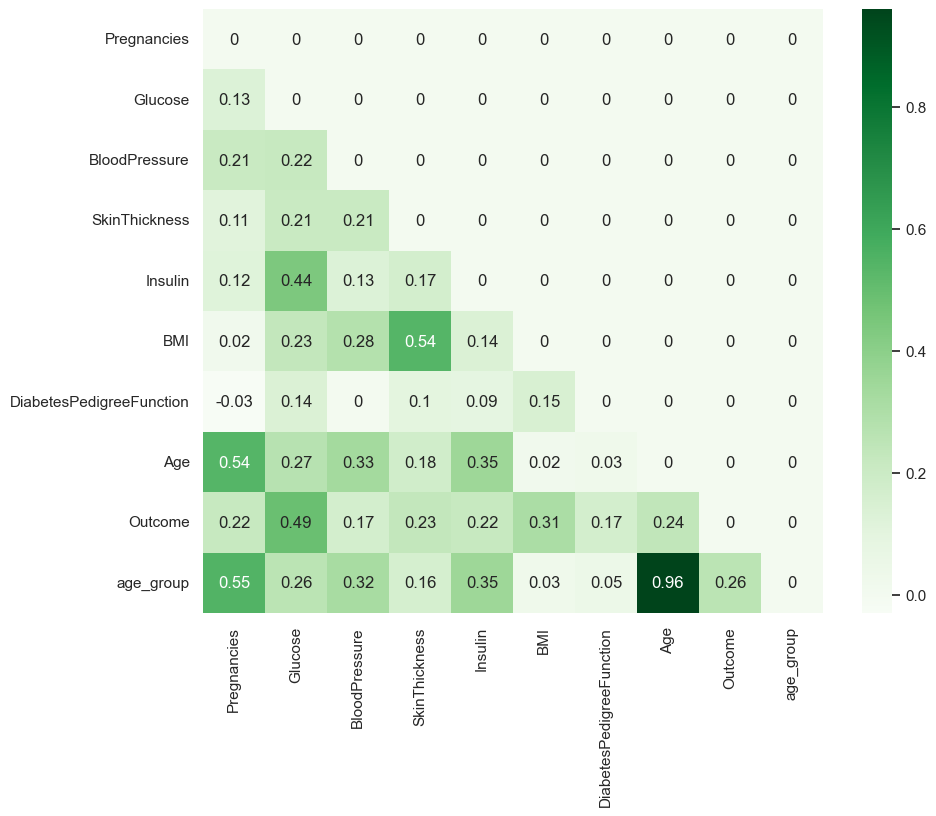

In [27]:
# heat map visualisation
figure = plt.figure(figsize = (10, 8), dpi=100)
sns.heatmap(corr, annot=True, cmap="Greens")
plt.show()

<a id='dummy_encoding'></a>

### Dummy encoding


Replacing chosen columns with 0-1 values based on common knowledge

[BMI norms](https://www.topendsports.com/testing/norms/bmi.htm) <br>
[Glucose norms](https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296) <br>
[Age one of the factor](https://www.cdc.gov/diabetes/basics/type2.html)

In [28]:
df[[ "BMI", "Glucose", "Age"]].describe()

,BMI,Glucose,Age
count,768.000000,768.000000,768.000000
mean,32.448397,121.673170,33.240885
std,6.875730,30.439817,11.760232
min,18.200000,44.000000,21.000000
25%,27.500000,99.750000,24.000000
50%,32.012990,117.000000,29.000000
75%,36.600000,140.250000,41.000000
max,67.100000,199.000000,81.000000


In [29]:
df["Overweight"] = df["BMI"].apply(lambda x: 1 if x >= 25 else 0)
df["Glucose_at_risk"] = df["Glucose"].apply(lambda x: 1 if x >= 140 else 0)
df["Getting_older"] = df["Age"].apply(lambda x: 1 if x >= 40 else 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group,Overweight,Glucose_at_risk,Getting_older
0,6,148.0,72.0,35.00000,162.166667,33.6,0.627,50,1,3,1,1,1
1,1,85.0,66.0,29.00000,162.743243,26.6,0.351,31,0,2,1,0,0
2,8,183.0,64.0,31.31068,162.743243,23.3,0.672,32,1,2,0,1,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,1,1,0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,4,1,0,1
764,2,122.0,70.0,27.00000,140.624000,36.8,0.340,27,0,1,1,0,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,1,1,0,0
766,1,126.0,60.0,31.30000,162.166667,30.1,0.349,47,1,3,1,0,1


In [30]:
# check if outcome is dependent on newly created columns using chi-squered test
# if p-value is below a treshold 0.05 then outcome and newly created column are dependent
cross_tab_BMI = pd.crosstab(df["Overweight"], df["Outcome"])
print(f"P-value dla Overweight: {chi2_contingency(cross_tab_BMI)[1]:.10f}") # [1] --> wartość p-value

cross_tab_glucose = pd.crosstab(df["Glucose_at_risk"], df["Outcome"])
print(f"P-value dla Glucose_at_risk: {chi2_contingency(cross_tab_glucose)[1]:.10f}")

cross_tab_age = pd.crosstab(df["Getting_older"], df["Outcome"])
print(f"P-value dla Getting_older: {chi2_contingency(cross_tab_age)[1]:.10f}")

P-value dla Overweight: 0.0000000001
P-value dla Glucose_at_risk: 0.0000000000
P-value dla Getting_older: 0.0000000018


In [31]:
# replacing chosen features with 0-1 newly created columns
df.drop(columns=["BMI", "Glucose", "Age"], inplace=True)
target_col = df.pop('Outcome')
df = df.assign(Outcome=target_col)
df

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,age_group,Overweight,Glucose_at_risk,Getting_older,Outcome
0,6,72.0,35.00000,162.166667,0.627,3,1,1,1,1
1,1,66.0,29.00000,162.743243,0.351,2,1,0,0,0
2,8,64.0,31.31068,162.743243,0.672,2,0,1,0,1
3,1,66.0,23.00000,94.000000,0.167,1,1,0,0,0
4,0,40.0,35.00000,168.000000,2.288,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
763,10,76.0,48.00000,180.000000,0.171,4,1,0,1,0
764,2,70.0,27.00000,140.624000,0.340,1,1,0,0,0
765,5,72.0,23.00000,112.000000,0.245,1,1,0,0,0
766,1,60.0,31.30000,162.166667,0.349,3,1,0,1,1


In [32]:
X = df.iloc[:, :-1]
Y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y,
    test_size=1/3,
    random_state=42)

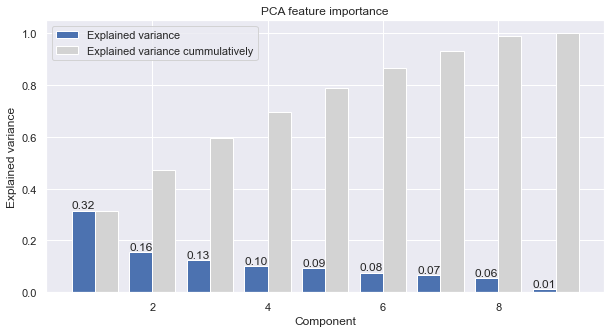

In [33]:
# vizualization of importance of PCA components

X_train_for_importance, X_test_for_importance, y_train_for_importance, y_test_for_importance = train_test_split(X, Y, test_size=1/3, random_state=42)

# Standardize the training and test sets
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_components = PCA().fit(X_train_scaled).explained_variance_ratio_
pca_components_cumm_value = 0
pca_components_cumm_list = []
for i in pca_components:
    pca_components_cumm_value += i
    pca_components_cumm_list.append(pca_components_cumm_value)

# chart settings
figure, ax = plt.subplots(figsize=(10,5))
x_values = np.arange(1, len(pca_components)+1)
bar_width = 0.4

# creating a chart
bar1 = ax.bar(x = x_values - bar_width / 2,
              height = pca_components,
              width = bar_width,
              label = 'Explained variance')

bar2 = ax.bar(x = x_values + bar_width / 2,
              height = pca_components_cumm_list,
              width = bar_width,
              label = 'Explained variance cummulatively',
              color = 'lightgrey')

# labelling
ax.set_title('PCA feature importance')
ax.set_xlabel('Component')
ax.set_ylabel('Explained variance')
ax.bar_label(bar1, fmt='%.2f')
ax.legend();

In [34]:
# Five components explain 80% of variation
# Fit PCA on the training set and transform the training and test sets
pca = PCA(n_components=5).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.31570843, 0.15542983, 0.12508807, 0.09994225, 0.09352151])

<a id='logistic_regression_model'></a>

### Logistic regression model

In [35]:
# logistic regression model build on standarized data
steps_stand_LR = [('standarization', StandardScaler()),
                  ('logistic_regression_stand', LogisticRegression(random_state=42))]
pipeline_stand_LR = Pipeline(steps_stand_LR)

    
param_grid_stand_LR = {'logistic_regression_stand__C': [0.01, 0.02, 0.03, 0.04, 0.05,  0.06,  0.07,  0.08,  0.09, 0.1]}
grid_stand_LR = GridSearchCV(pipeline_stand_LR, param_grid_stand_LR, cv=5)
grid_stand_LR.fit(X_train, y_train)

print("best parameters__stand_LR: ", grid_stand_LR.best_params_)
print("training_stand_LR: ", grid_stand_LR.score(X_train, y_train))
print("test_stand_LR: ", grid_stand_LR.score(X_test, y_test))

best parameters__stand_LR:  {'logistic_regression_stand__C': 0.03}
training_stand_LR:  0.751953125
test_stand_LR:  0.734375


In [36]:
# logistic regression model build on standarized data and reduced dimensionality data
steps_stand_PCA_LR = [('standarization', StandardScaler()),
                      ('pca', PCA(n_components=5)),
                      ('logistic_regression_stand_PCA', LogisticRegression(random_state=42))]
pipeline_stand_PCA_LR = Pipeline(steps_stand_PCA_LR)

    
param_grid_stand_PCA_LR = {'logistic_regression_stand_PCA__C': [0.01, 0.02, 0.03, 0.04, 0.05,  0.06,  0.07,  0.08,  0.09, 0.1]}
grid_stand_PCA_LR = GridSearchCV(pipeline_stand_PCA_LR, param_grid_stand_PCA_LR, cv=5)
grid_stand_PCA_LR.fit(X_train, y_train)

print("best parameters__stand_PCA_LR: ", grid_stand_PCA_LR.best_params_)
print("training_stand_PCA_LR: ", grid_stand_PCA_LR.score(X_train, y_train))
print("test_stand_PCA_LR: ", grid_stand_PCA_LR.score(X_test, y_test))

best parameters__stand_PCA_LR:  {'logistic_regression_stand_PCA__C': 0.08}
training_stand_PCA_LR:  0.74609375
test_stand_PCA_LR:  0.71875
